## open cv 图像读取基本操作

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [38]:
dir = 'D:/code/python/augment/502.png'

opencv 读入彩色格式图像

In [39]:
img_cv2 = cv2.imread(dir) # cv2将图片读入为numpy格式，数据类型为uint8
print(img_cv2.shape) # (h,w,c)
print(img_cv2.dtype)
cv2.imshow('name1',img_cv2)
cv2.waitKey()# cv2 会在一个单独的窗口显示图片

(200, 200, 3)
uint8


-1

opencv显示图像会跳到窗口外，所以这里用matplot显示图像

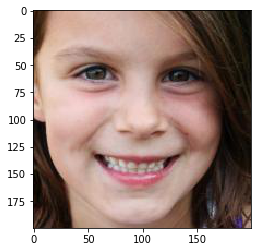

In [42]:
img_cv2 = img_cv2[...,::-1] # 通道转换
plt.imshow(img_cv2)

opencv 读入灰度格式图像

In [43]:
graypic_cv2 = cv2.imread(dir,cv2.IMREAD_GRAYSCALE)
print(graypic_cv2.shape)
print(graypic_cv2.dtype)
cv2.imshow('name2',graypic_cv2)
cv2.waitKey()

(200, 200)
uint8


-1

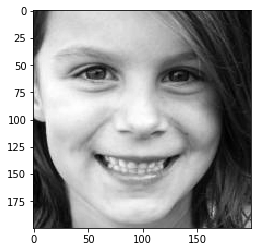

In [45]:
plt.imshow(graypic_cv2 , cmap='gray')

opencv 读入灰度图像后转化为彩色图像

(200, 200)
uint8


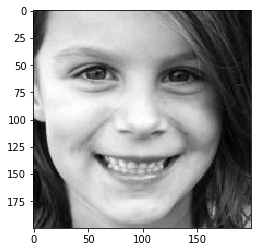

In [48]:
img_cv2 = cv2.imread(dir) 
graypic_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)
print(graypic_cv2.shape)
print(graypic_cv2.dtype)
plt.imshow(graypic_cv2, cmap = 'gray')

深度学习中一般是channel在h、w之前，且最前面有batch维度

In [49]:
img_cv2 = img_cv2.transpose(2,0,1)# numpy矩阵转置 (h,w,c)->(c,h,w)
print(img_cv2.shape)
img_cv2_batch = np.expand_dims(img_cv2, axis = 0) # (c,h,w)->(n,c,h,w)
print(img_cv2_batch.shape)

(3, 200, 200)
(1, 3, 200, 200)


多张图像的快速生成(n,c,h,w)可以使用循环读入加入到list的方法

In [50]:
data_list = [] 
for i in range(5):
    im = cv2.imread(dir) # (h,w,c)
    im = im.transpose(2,0,1) # (c,h,w)
    data_list.append(im)
data_arr = np.array(data_list)
print(data_arr.shape)

(5, 3, 200, 200)


图片归一化，opencv读入的图片矩阵数值是0到255，有时我们需要对其进行归一化为0~1

In [51]:
img_cv2 = cv2.imread(dir) 
img_cv2 = img_cv2.astype('float')/ 255.0
print(img_cv2.shape)
print(img_cv2.dtype)
print(np.max(img_cv2))

(200, 200, 3)
float64
0.9686274509803922


操作后存储图片，需要从0~1转换回0~255，否则肉眼不可见分辨率

In [52]:
dir = 'D:/code/python/augment/502_new.png'
cv2.imwrite(dir, img_cv2) # black image
img_cv2 = img_cv2 * 255
cv2.imwrite(dir, img_cv2) # normal image

True

opencv读入BGR转换为RGB

In [53]:
img_cv2 = cv2.imread(dir) 
img_cv2_rgb = img_cv2[..., ::-1]

访问像素与ROI操作

In [54]:
print(img_cv2[10,10])
img_roi = img_cv2[50:100,50:100,:]
cv2.imshow('name',img_roi)
cv2.waitKey()

[39 61 96]


-1

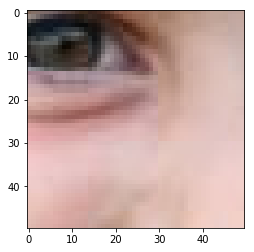

In [55]:
img_roi = img_roi[...,::-1]
plt.imshow(img_roi)

通道分离与合并

In [56]:
(b,g,r) = cv2.split(img_cv2)
img_rgb = cv2.merge((r,g,b))
img_cv2[:,:,2] = 0 # 将红色通道设置为0
print(img_cv2[10,10])

[39 61  0]
